<a href="https://colab.research.google.com/github/cammylexi/CS2341-Assignment-3/blob/main/Lab_Two_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding

## Overview of Dataset:

This dataset consists of 2,000 high-resolution images of skin lesions at a size of 224 x 224 pixels and is designed to help diagnose melanoma [1]. Melanoma is a dangerous form of skin cancer that develops in the pigment-producing cells of the skin, called melanocytes, and can be fatal if not detected early [2]. However, it can be cured if early diagnosis and interventions occur [2]. The dataset includes benign (non-cancerous growth) and malignant lesions (cancerous growth), enabling a machine-learning model to help classify abnormalities based on visual features [1].

## The Purpose:

The dataset was collected to support early detection and diagnosis of melanoma by leveraging advancements in computer-aided diagnostic tools. The goal is to improve dermatological workflow by reducing diagnostic errors and increasing the efficiency of identifying malignant lesions.

## Prediction Task and Third Party Interest:

The main prediction of this task is to classify whether a given image of skin shows a benign lesion or a malignant lesion. This binary classification task is crucial for prioritizing patients who require immediate medical attention. By modeling this data would help third parties make better decisions and enhancements to aid in melanoma diagnosis. Dermatogoglist and Oncolglists would be interested in using predictive modeling to make decisions to improve diagnostic accuracy [3]. Hospitals and clinics can integrate the model into electronic health systems to streamline workflows and reduce healthcare costs [4]. In addition, pharmaceutical companies can use this data for clinical trials to study melanoma treatments and preventive measures [5].


## Importance of the data:

This dataset addresses an important need for early detection and diagnosis of melanoma because early diagnosis dramatically improves survival rates. A study reported that experts with over 10 years of experience in the field had an 80% accuracy rate for diagnosis [6]. This shows that traditional diagnosis methods that require a dermatologist's expertise can be subjective and prone to errors. By automating and standardizing this process with machine learning could increase diagnostic accuracy [3]. It also provides access to reliable tools in underserved or rural areas with fewer specialists [3]. In addition, early melanoma detection helps reduce the emotional and financial burden on patients [3].



## Prediction algorithm:

For the prediction algorithm to be considered useful to third parties, it must perform above the accuracy rate of a >10-year dermatologist's expertise (80%). Ideally, a high accuracy of > 95%, especially in identifying malignant lesions, is needed to minimize false negatives that could lead to missed cancer diagnoses. Plus, there is a need to display a low rate of false positives to avoid unnecessary biopsies and patient stress. Another requirement is to make sure the predictions are explainable so that the dermatologist can trust the system's results.



---


<br>

#References

[1] B. Mittal, “🔬Melanoma Cancer Image Dataset,” Kaggle.com, 2024. https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset/data

[2] Cleveland Clinic, “Melanoma,” Cleveland Clinic, Jun. 21, 2021. https://my.clevelandclinic.org/health/diseases/14391-melanoma

[3] M. L. Wei, M. Tada, A. So, and R. Torres, “Artificial intelligence and skin cancer,” Frontiers in medicine, vol. 11, Mar. 2024, doi: https://doi.org/10.3389/fmed.2024.1331895.

[4] F. M. Bowens, P. A. Frye, and W. A. Jones, “Health Information Technology: Integration of Clinical Workflow into Meaningful Use of Electronic Health Records,” Perspectives in Health Information Management / AHIMA, American Health Information Management Association, vol. 7, no. Fall, p. 1d, Oct. 2010, Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC2966355/

[5] S. Wróbel, M. Przybyło, and E. Stępień, “The Clinical Trial Landscape for Melanoma Therapies,” Journal of Clinical Medicine, vol. 8, no. 3, p. 368, Mar. 2019, doi: https://doi.org/10.3390/jcm8030368.

[6] Morton and Mackie, “Clinical accuracy of the diagnosis of cutaneous malignant melanoma,” British Journal of Dermatology, vol. 138, no. 2, pp. 283–287, Feb. 1998, doi: https://doi.org/10.1046/j.1365-2133.1998.02075.x.

#Data Preparation

## Kaggle
We decided that the simplest approach would be to grab the files directly from Kaggle. Because of that, we needed to upload our kaggle.json API Key and then use it to import the dataset.



In [ ]:
# DO NOT TOUCH
from google.colab import files
files.upload()  # Select kaggle.json from your computer
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset
!unzip melanoma-cancer-dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/Malignant/1530.jpg  
  inflating: /content/dataset/train/Malignant/1531.jpg  
  inflating: /content/dataset/train/Malignant/1532.jpg  
  inflating: /content/dataset/train/Malignant/1533.jpg  
  inflating: /content/dataset/train/Malignant/1534.jpg  
  inflating: /content/dataset/train/Malignant/1535.jpg  
  inflating: /content/dataset/train/Malignant/1536.jpg  
  inflating: /content/dataset/train/Malignant/1537.jpg  
  inflating: /content/dataset/train/Malignant/1538.jpg  
  inflating: /content/dataset/train/Malignant/1539.jpg  
  inflating: /content/dataset/train/Malignant/154.jpg  
  inflating: /content/dataset/train/Malignant/1540.jpg  
  inflating: /content/dataset/train/Malignant/1541.jpg  
  inflating: /content/dataset/train/Malignant/1542.jpg  
  inflating: /content/dataset/train/Malignant/1543.jpg  
  inflating: /content/dataset/train/Malignant/1544.jpg  
  inflating: /content/dataset/train/Ma

## Numpy Arrays
Next we need to import all of our data as numpy arrays so that we can visualize and analyze the data using PCA and RPCA. Our data currently exists in two directories, so we will access both of them and then use numpy's vpstack function to turn them into one array.

We also decided that since we want to use this data to train an AI model, we will also keep a parallel array of whether each image is Benign or Malignant.

In [ ]:
import cv2
import numpy as np
import os
from glob import glob

# Define the image folders and paths. This is setup so that our function goes through every file that we downloaded.
benign_image_dir = "/content/dataset/test/Benign"
malignant_image_dir = "/content/dataset/test/Malignant"
benign_image_paths = glob(os.path.join(benign_image_dir, "*.jpg"))
malignant_image_paths = glob(os.path.join(malignant_image_dir, "*.jpg"))

# Set the target size for resizing. This doubles down to make sure every image is uniform in size.
target_size = (128, 128) # I think the resizing is 20x20 pixels

def load_resized_images_cv(image_paths, size):
    images = [] # create array to store images
    for path in image_paths: # for every file in the directory we specify:
        img = cv2.imread(path)  # Read the image
        if img is None:
            print(f"Warning: Could not read {path}") # if there is no image, simply print an error and move on
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)  # Resize to 128x128
        images.append(img) # put the picture in the images array
    return np.array(images) # once we've iterated through everything, return our array as our result of the function

# Load images as NumPy arrays
benign_image_data = load_resized_images_cv(benign_image_paths, target_size)
malignant_image_data = load_resized_images_cv(malignant_image_paths, target_size)

# Combine all both arrays into one dataset
image_data = np.vstack((benign_image_data, malignant_image_data))

# Create parallel label array: 0 for benign, 1 for malignant. We decided on this to create a supervised training model
benign_labels = np.zeros(len(benign_image_data))  # Array of 0s
malignant_labels = np.ones(len(malignant_image_data))  # Array of 1s
labels = np.concatenate((benign_labels, malignant_labels))

print(f"Final dataset shape: {image_data.shape}")
print(f"Labels shape: {labels.shape}")

Final dataset shape: (2000, 128, 128, 3)
Labels shape: (2000,)


## Linearization
Now that we have all of our images in a numpy array, it's time to linearize the features so that we can analyze our data using PCA. We are goingn to opt to not create a pandas df from it, since we need to use the numpy arrays later for dimension reduction. Matplotlib expects pixel values in the 0-1 range for floating-point images, but OpenCV originally loads them in the 0-255 range. To fix that, we also normalize our data at the end. Here is our code:

In [ ]:
# Reshape the image array into a 2D table where each row is an image
num_images, height, width, channels = image_data.shape
flattened_images = image_data.reshape(num_images, height * width * channels)

print(flattened_images.shape)  # Should be (num_images, height * width * channels)

flattened_images = flattened_images / 255.0  # Normalize pixel values

(2000, 49152)


## Visualization
Finally, to complete data preparation, we need to visualize several images. We opted to create a function that would allow us to come back and reuse it later if we need to. It's a quick way to just plot several images from a specified dataset at once. Here is what we did for it:

In [ ]:
import matplotlib.pyplot as plt

def display_images(data, image_shape, indices=None, num_images=6, normalize=True):
  # Parameters:
  #       data (numpy array): The dataset where each row is a flattened image.
  #       image_shape (tuple): The original shape of the image (height, width, channels).
  #       indices (list or None): Specific indices of images to display (optional).
  #       num_images (int): Number of images to display if indices are not provided.
  #       normalize (bool): Whether the data is normalized (scaled 0-1) and needs rescaling to 0-255.

    image_height, image_width, num_channels = image_shape

    # Select indices for images to display
    if indices is None:
        indices = np.random.choice(len(data), num_images, replace=False)  # Pick random images

    fig, axes = plt.subplots(1, len(indices), figsize=(15, 5))

    for i, idx in enumerate(indices):
        img = df.iloc[idx].values.reshape(image_height, image_width, num_channels)  # Extract row and shape

        if normalize:
            img = (img * 255).astype(np.uint8)  # Convert back to 0-255 range if normalized

        axes[i].imshow(img)
        axes[i].axis("off")

    plt.show()

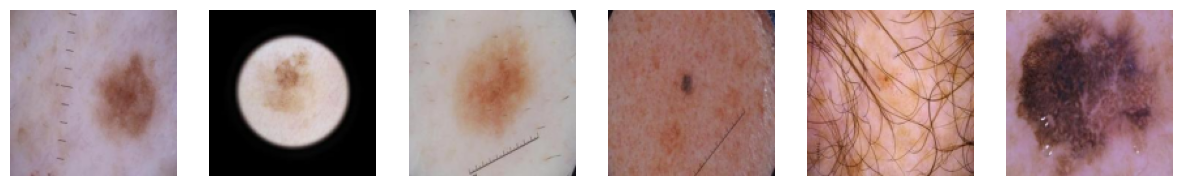

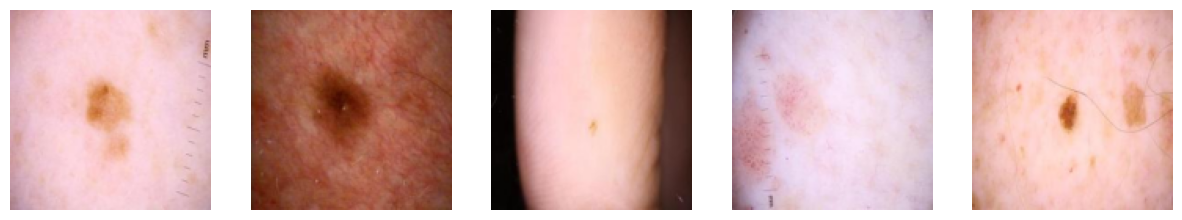

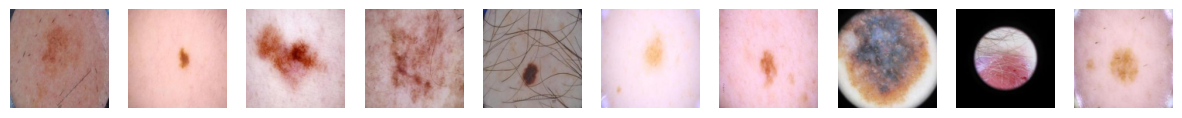

In [ ]:
# Some different use cases for this function
display_images(flattened_images, image_shape=(128, 128, 3))
display_images(flattened_images, image_shape=(128, 128, 3), indices=[0, 10, 20, 30, 40])
display_images(flattened_images, image_shape=(128, 128, 3), num_images=10)

#Data Reduction

##Principal Components Analysis

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA()
X_pca = pca.fit_transform(flattened_images)

Let's try to run this as little as possible because my first run took 54 seconds, so it will slow us down if we have to run this code over and over. Only run it if we change something on loading the data.

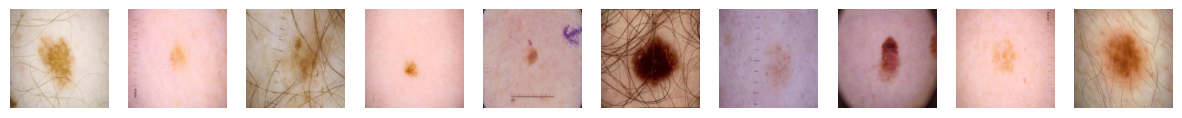

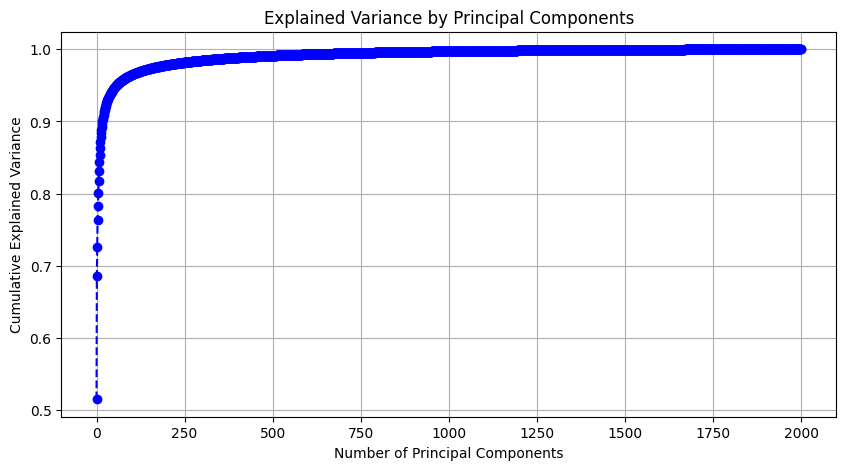

In [ ]:
display_images(X_pca, image_shape=(128, 128, 3), num_images=10)
# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


In [ ]:
# Find the number of components needed to remove x% variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
def find_num_components(threshold) :
    num_components = np.argmax(explained_variance >= threshold) + 1  # Get first index where variance ≥ threshold's%
    print(f"Number of components needed to retain {threshold}% variance: {num_components}")


find_num_components(0.99)
find_num_components(0.97)
find_num_components(0.95)
find_num_components(0.90)

Number of components needed to retain 0.99% variance: 457
Number of components needed to retain 0.97% variance: 130
Number of components needed to retain 0.95% variance: 58
Number of components needed to retain 0.9% variance: 18


We eliminate 90% variance quite quickly, so we could either opt to reduce to any of these other percentages.

It is generally regarded good practice to work with 95% variance, but we could possibly do more since our set is so small. For now I will work with 95%, but we can always change it.

In [ ]:
# Apply PCA with the optimal number of components (58 for now)
pca_optimal = PCA(n_components=457)
X_reduced = pca_optimal.fit_transform(flattened_images)

print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape: {X_reduced.shape}")  # Should now be (num_images, num_components)


Original shape: (2000, 49152)
Reduced shape: (2000, 457)


* 95% variance took ten seconds to compute
* 97% took 15s
* 99% took 31s

##Randomized Principle Components Analysis